# Assignment: regression

Regression is a predictive modeling task that involves predicting a numerical output given some input. It is different from classification tasks that involve predicting a class label.

Typically, a regression task involves predicting a single numeric value. Although, some tasks require predicting more than one numeric value. These tasks are referred to as multiple-output regression, or multi-output regression for short.

In multi-output regression, two or more outputs are required for each input sample, and the outputs are required simultaneously. The assumption is that the outputs are a function of the inputs.



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Train-with-a-real-dataset" data-toc-modified-id="Train-with-a-real-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Train with a real dataset</a></span><ul class="toc-item"><li><span><a href="#Preprocess-the-data-(outlier-?-missing-value-?)" data-toc-modified-id="Preprocess-the-data-(outlier-?-missing-value-?)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preprocess the data (outlier ? missing value ?)</a></span></li><li><span><a href="#Build-and-fit-the-model" data-toc-modified-id="Build-and-fit-the-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Build and fit the model</a></span></li><li><span><a href="#Predict-insurance-charge-on-new-data" data-toc-modified-id="Predict-insurance-charge-on-new-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Predict insurance charge on new data</a></span></li></ul></li></ul></div>

## Train with a real dataset

Understanding the data
* Age: insurance contractor age, years
* Sex: insurance contractor gender, [female, male]
* BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* Children: number of children covered by health insurance / Number of dependents
* Smoker: smoking, [yes, no]
* Region: the beneficiary’s residential area in the US, [northeast, southeast, southwest, northwest]

You have to predict the charges
* Charges: Individual medical costs billed by health insurance, $ #predicted value

In [1]:
import pandas as pd

df = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
from sklearn.model_selection import train_test_split

''' Split dataset '''
df_train, df_test = train_test_split(df, test_size=0.2)

### Preprocess the data (outlier ? missing value ?)

In [5]:
''' Check for missing value '''
def missing_value(df, txt):
    if df.isna().any().any():
        print("Replace missing value on %s" % txt)
    else:
        print("There is no missing value on %s" % txt)
        
missing_value(df_train, "train")
missing_value(df_test, "test")

There is no missing value on train
There is no missing value on test


In [7]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

numerical = ["age", "bmi", "children"]
categorical = ["sex", "smoker", "region"]
target = ['charges']

''' Normalize numerical features '''
scalarX = MinMaxScaler()
scalarX.fit(df_train[numerical])
X_train = scalarX.transform(df_train[numerical])
X_test = scalarX.transform(df_test[numerical])

''' OneHotEncode categorical features '''
ohe = OneHotEncoder(sparse=False)
ohe.fit(df_train[categorical])
X_train = np.concatenate((X_train, ohe.transform(df_train[categorical])), axis=1)
X_test = np.concatenate((X_test, ohe.transform(df_test[categorical])), axis=1)

''' Normalize labels '''
scalarY = MinMaxScaler()
scalarY.fit(df_train[target])
y_train = scalarY.transform(df_train[target])
y_test = scalarY.transform(df_test[target])

In [9]:
N_features = X_train.shape[1]
N_targets = y_train.shape[1]

### Build and fit the model

In [10]:
''' Define and compile the model '''
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.metrics import RootMeanSquaredError

optimizer = 'adam'
loss = 'mean_squared_error'
metrics = [RootMeanSquaredError()]

# This returns a tensor
inputs = Input(shape=(N_features,))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(16, activation='relu')(inputs)
output_2 = Dense(8, activation='relu')(output_1)
predictions = Dense(N_targets, activation='linear')(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [11]:
N_epochs = 20
validation_split = 0.1

history = model.fit(X_train, y_train, epochs=N_epochs, validation_split=validation_split)

Epoch 1/20
31/31 [==============================] - 0s 5ms/step - loss: 0.0804 - root_mean_squared_error: 0.2835 - val_loss: 0.0442 - val_root_mean_squared_error: 0.2103
Epoch 2/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0465 - root_mean_squared_error: 0.2156 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1523
Epoch 3/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0303 - root_mean_squared_error: 0.1742 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1306
Epoch 4/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0217 - root_mean_squared_error: 0.1472 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1192
Epoch 5/20
31/31 [==============================] - 0s 1ms/step - loss: 0.0158 - root_mean_squared_error: 0.1258 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1134
Epoch 6/20
31/31 [==============================] - 0s 1ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0125 - val_root_mean_sq

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


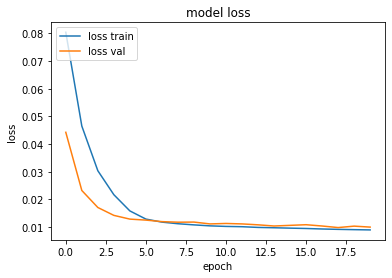

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot history
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='upper left')
plt.show()

### Predict insurance charge on new data

Let’s imagine 3 different people and see what charges on health care will be for them.

* Bob: 19 years old, BMI 27.9, has no children, smokes, from northwest region.
* Lisa: 40 years old, BMI 50, 2 children, doesn’t smoke, from southeast region.
* John: 30 years old. BMI 31.2, no children, doesn’t smoke, from northeast region.

In [13]:
Bob=np.array([19, 27.9, 0, 'male', 'yes', 'northwest'])
Lisa=np.array([40, 50, 2, 'female', 'no', 'southeast'])
John=np.array([30, 31.2, 0, 'male', 'yes', 'northwest'])

peoples = np.array((Bob, Lisa, John))
peoples.shape

(3, 6)

In [14]:
''' One Hot Encode and Normalize '''
to_predict = []
for i in range(len(peoples)):
    to_predict.append(np.concatenate((scalarX.transform(peoples[i,:3].reshape(1,-1)),
                      ohe.transform(peoples[i,3:].reshape(1,-1))),
                      axis=1).reshape(-1))
to_predict = np.array(to_predict)
to_predict.shape

(3, 11)

In [15]:
''' Predict'''
charges = model.predict(to_predict)
charges = scalarY.inverse_transform(charges)
charges

array([[26406.271],
       [14519.946],
       [29272.072]], dtype=float32)

In [16]:
''' Transform the prediction '''
for i, n in enumerate(["Bob", "Lisa", "John"]):
    print("Insurance charge for %s is %.2f" % (n, charges[i]))

Insurance charge for Bob is 26406.27
Insurance charge for Lisa is 14519.95
Insurance charge for John is 29272.07
